<a href="https://colab.research.google.com/github/nomiku1999/KTDLUD/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"

Nhóm 2:

1.   1712892 - Nguyễn Thị Tuyết
2.   1712898 - Trần Việt Văn - tvvan99
3.   1712685 - Trần Huy Phượng - nomiku1999

Link thùng chứa Github của nhóm: https://github.com/nomiku1999/KTDLUD


## Mô tả bài toán

* **Tên cuộc thi**: [March Machine Learning Mania 2021 - NCAAM
Predict the 2021 NCAAM Basketball Tournament](https://www.kaggle.com/competitions/ncaam-march-mania-2021/overview/description)

* **Mô tả**: Dự đoán kết quả của giải thi đấu bóng rổ NCAA 2021 dành cho nam dựa trên dữ liệu lịch sử trận đấu được lưu trữ trước đó. Cuộc thi được chia làm 2 stage
  * Stage 1: Ta sẽ dự đoán kết quả cho 5 giải gần nhất (từ 2015 đến 2019), đây là những giải đã diễn ra trước đó và có kết quả
  * Stage 2: Ta sẽ dự đoán kết quả cho giải đấu vào năm 2021 (tại thời điểm cuộc thi diễn ra giải đấu chưa được tổ chức) 
* **Input**: Dữ liệu được cung cấp bao gồm lịch sử các trận đấu của giải
* **Output**: Model dự đoán kết quả của các trận đấu, tỉ lệ thắng của đội có id đứng trước so với đội có id đứng sau
* **Metric**:

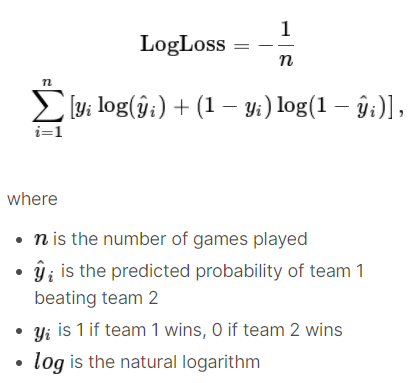

Link to competition
https://www.kaggle.com/competitions/ncaam-march-mania-2021/overview/description

## Giải quyết bài toán

###1. Ý tưởng

Sử dụng các thuật toán machine learning để dự đoán kết quả trận đấu dựa trên dữ liệu các trận đấu trong lịch sử, train 1 vài model thông dụng để chọn được model với metric tốt nhất cho dataset

Sử dụng dữ liệu từ 3 csv file:
* MRegularSeasonCompactResults: dữ liệu lịch sử trận đấu, gồm đội thắng, đội thua, điểm số
* MRegularSeasonDetailedResults: dữ liệu lịch sử chi tiết bao gồm thêm 1 số field chứa thông tin thêm của trận đấu
* MMasseyOrdinals: dữ liệu chứa ranking của các đội

Submission file:
* MSampleSubmission chứa 2 field, field đầu tiên là id của trận đấu, field thứ 2 chứa xác suất team có id nhỏ hơn đứng trước thắng trận đấu (field này phải predict)

Ex: 

    2015_1107_1110,0.5
    2015_1107_1112,0.5
    2015_1107_1113,0.5

Số đầu tiên biểu thị cho năm, số thứ 2 là id của đội đầu tiên, số thứ 3 là id của đội thứ hai, số cuối cùng (sau dấy phẩy) biểu thị xác suất đội đầu tiên thắng đội thứ 2

###2. Solution

####a/ Thông tin chung

Nhóm sẽ sử dụng solution rank 9 tại private leaderboard

Link to solution: https://www.kaggle.com/c/ncaam-march-mania-2021/discussion/230991

* Data input: Dữ liệu lịch sử trận đấu cũ đến trước năm 2015

    * MRegularSeasonCompactResults: trích xuất dữ liệu win rate khi thi đấu sân nhà sân khách, điểm số cách biệt khi thi đấu sân nhà sân khách
    * MRegularSeasonDetailsResult: trích xuất tất cả đặc trưng về điểm số, đồng thời tính toán tỉ lệ ghi bàn, ghi bàn 3 điểm và ghi bàn bằng free throw
    * MMasseyOrdinals: trích xuất các đặc trưng về ranking (max, min, mean) dựa trên thời gian

* Data test: Dữ liệu trận đấu từ 2015 đến năm 2020

Cuộc thi sẽ sử dụng solution để dự đoán cho kết quả thi đấu 2021 và dựa vào đó để trao giải



####b/ Tóm tắt các bước thực hiện



1.   Cleaning and extracting data from source
2.   Build multiple model for predicting
3.   Calculating metric for algorithms, choose the best model for predicting match result



####c/ Lí do lựa chọn

Lí do lựa chọn:
* Sử dụng data dạng table, dễ thao tác, tối ưu hóa phần cứng.
* Flow sử dụng đi qua hầu hết các bước như data cleaning, trích xuất data phù hợp với yêu cầu
* Solution sử dụng cùng lúc nhiều model để predict, các model dễ hiểu và tiếp cận với nhóm.

###3. Cài đặt

#### Download data cần thiết


In [11]:
!gdown --id 1ofkP8iEjYLgLGKvrH86-DgiWrqE1WE9G
!gdown --id 1e1CEMnPm_w86CANCsxPWGw1bxsjoQ90I
!gdown --id 1WvUcjTKRr8HLzVFqcu8R0oG836fAiXfc
!gdown --id 1H0m7Nnu1i49lGCVaM1G9OoB2mmEsTbT7
!gdown --id 1uE9IRWIPTj4_6LZYuMSb7Hlzpkxfc0As

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ofkP8iEjYLgLGKvrH86-DgiWrqE1WE9G
To: /content/MRegularSeasonDetailedResults.csv
100% 9.25M/9.25M [00:00<00:00, 292MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1e1CEMnPm_w86CANCsxPWGw1bxsjoQ90I
To: /content/MRegularSeasonCompactResults.csv
100% 4.89M/4.89M [00:00<00:00, 171MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  categor

#### Import các thư viện cần thiết

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.model_selection import GroupKFold, KFold
from sklearn.metrics import log_loss
import lightgbm as lgb

#### Đọc dữ liệu vào các pd dataframe

In [12]:
MRSCResults = pd.read_csv('MRegularSeasonCompactResults.csv')

In [13]:
MRSCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
166875,2020,128,1204,81,1209,62,A,0
166876,2020,128,1402,85,1111,68,H,0
166877,2020,128,1299,86,1224,77,N,0
166878,2020,128,1393,81,1314,53,N,0


* Đầu tiên, ta có dataframe MRSCResults. dataframe này chứa kết quả các trận đấu kể từ năm 1985. Với mỗi mùa giải, dữ liệu sẽ bao gồm tất cả trận đấu từ ngày thi đấu thứ 0 đến 132 (các trận đấu vòng bảng).
* Có 8 cột trong dataframe này, bao gồm:
  * Season: mùa giải của trận đấu
  * DayNum: ngày thi đấu thứ bao nhiêu
  * WTeamID: id của đội thắng
  * WScore: điểm số của đội thắng
  * LTeamID: id của đội thua
  * LScore: điểm số của đội thua
  * WLoc: đội thắng thi đấu trên sân nhà hay sân khách
  * NumOT: thời gian thi đấu bù giờ của trận đấu, là số nguyên lớn hơn hoặc bằng 0

In [14]:
MRSDetailedResults = pd.read_csv('MRegularSeasonDetailedResults.csv')

In [15]:
MRSDetailedResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,128,1389,56,1233,54,N,0,15,60,...,16,18,20,4,27,6,17,8,4,20
92828,2020,128,1393,81,1314,53,N,0,28,61,...,16,11,13,13,29,9,18,0,1,18
92829,2020,128,1402,85,1111,68,H,0,34,57,...,15,25,35,8,17,6,18,7,2,18
92830,2020,128,1412,74,1427,69,N,0,26,53,...,27,7,7,12,22,11,13,4,2,18


* Tiếp theo, ta có dataframe MRSDetailedResults. Dataframe này sẽ chứa dữ liệu về điểm số và các field liên quan tới điểm số cho các trận đấu. Dữ liệu điểm số sẽ được tính từ năm 2003 trở đi. Các dữ liệu trận đấu trong dataframe này sẽ present các trận đấu trong dataframe MRSCompactResults, gồm 34 cột.
  * WFGM: số bàn ghi được của đội thắng
  * WFGA: số cơ hội tạo ra của đội thắng
  * WFGM3: số lượng bàn thắng đạt 3 điểm của đội thắng
  * WFGA3: số cơ hội để ghi bàn 3 điểm của đội thắng
  * WFTM: số lượng free throw ghi bàn của đội thắng
  * WFTA: số lượng free throw của đội thắng
  * WOR: chỉ số tấn công (ném rổ hụt và tiếp tục bắt được bóng)
  * WDR: chỉ số phòng ngự (đội đối phương ném rổ hụt và đội mình bắt được bóng)
  * Wast: số lượng hỗ trợ ghi bàn
  * WTO: số lần phản công
  * WStl: số lần cướp bóng
  * WBik: số lần chặn bóng
  * WPF: số lượng phạm lỗi cá nhân
  (các trường còn lại bắt đầu với kí tự L sẽ là tương tự, nhưng là chỉ số của đội thua)

In [16]:
MMOrdinals = pd.read_csv('MMasseyOrdinals.csv')

In [17]:
MMOrdinals

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260
...,...,...,...,...,...
4120881,2020,128,WOL,1463,53
4120882,2020,128,WOL,1464,209
4120883,2020,128,WOL,1465,194
4120884,2020,128,WOL,1466,290


* Data frame MMOrdinals chứa dữ liệu ranking của các đội qua các mốc thời gian, dựa trên các trận đấu trước đó và hệ thống ranking của giải. Dataframe này chứa 5 cột
  * Season: năm diễn ra mùa giải
  * RankingDayNum: có boundary từ ngày 0 đến 133, trùng với ngày thi đấu. Field này cho ta biết ngày đánh giá. Ví dụ, ngày đánh giá là 110 thì dữ liệu đánh giá sẽ là dữ liệu trận đấu từ ngày 0 đến ngày 109
  * SystemName: tên của hệ thống đánh giá
  * TeamID: id của đội được đánh giá
  * OrdinalRank: rank của đội

In [18]:
TCResults = pd.read_csv('MNCAATourneyCompactResults.csv')

In [19]:
TCResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


* TCResults có định dạng giống như MRCResults. Dữ liệu của dataframe này chứa dữ liệu trận đấu của vòng chung kết. Các trận đấu sẽ diễn ra hoàn toàn trên sân chung (không phải sân nhà, sân khách)

In [20]:
MSampleSubmission = pd.read_csv('MSampleSubmissionStage1.csv')

In [21]:
MSampleSubmission

,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5
...,...,...
11385,2019_1449_1459,0.5
11386,2019_1449_1463,0.5
11387,2019_1458_1459,0.5
11388,2019_1458_1463,0.5


* MSampleSubmission chứa dữ liệu dự đoán xác suất của trận đấu. Gồm 2 field:
  * ID: có độ dài 14 kí tự với định dạng SSSS_XXXX_YYYY. SSSS là mùa giải diễn ra, XXXX là id của đội có id nhỏ hơn (sắp xếp theo chữ cái). YYYY là id của đội có id lớn hơn
  * Pred: chứa kết quả dự đoán tỉ lệ chiến thắng của đội XXXX trước đội YYYY

#### Trích xuất dữ liệu

Với dataframe MRSCompactResults, ta có thể thấy dataframe này chứa dữ liệu về điểm số, thắng thua, ta có thể trích xuất được win rate khi thi đấu trên sân nhà hoặc sân khách


Lọc các trận thắng khi thi đấu trên sân khách

In [23]:
A_w = MRSCResults[MRSCResults['WLoc'] == 'A']\
    .groupby(['Season','WTeamID'])['WTeamID'].count().to_frame()\
    .rename(columns={"WTeamID": "win_A"})

In [24]:
A_w

win_A
Season WTeamID       
1985   1102         3
       1103         2
       1104         5
       1106         1
       1108         8
...               ...
2020   1463        11
       1464         5
       1465         6
       1466         4
       1467         9

[11101 rows x 1 columns]

## Nhìn lại quá trình làm đồ án

## Tài liệu tham khảo